In [ ]:
1. 알고리즘
2. 통계기초(단순 회귀분석 및 모델평가)
3. 이미지 분류 모델링
4. 시계열 예측 모델링

In [1]:
path = r"C:\Users\Happy\Desktop\AI_project\자격증_빅분기 토스 _AICE\빅분기\input"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()


## 주로 사용하는 패키지와 모델

In [ ]:
# 회귀모델
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor, StackingRegressor, VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor # light xgboost
import lightgbm as lgb # lgb자체로도 학습이 가능 !! # https://for-my-wealthy-life.tistory.com/24

In [ ]:
# 라벨인코더(다분류), 스케일링
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder

In [ ]:
# 정확도 측정지표
from sklearn.metrics import accuracy_score, f1_score, r2_score , mean_absolute_error, mean_squared_error
help(mean_absolute_error)

In [ ]:
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,LabelEncoder,StandardScaler

# 이부분 class로 변환할까? 나중에 정해진 범위까지만 데이터 스케일링 할 수도 있음.
# def MinMaxScaler_fun(df): #맞춤 변환 함수와 그에 맞는 데이터를 돌려줌
#     col = list(df.columns)
#     Scaler = MinMaxScaler()
#     Scaler.fit(df)
#     df = Scaler.transform(df)
# #     df = Scaler_X.fit_transform(df)
#     df = pd.DataFrame(df, columns = X_col)
#     return df, Scaler
# X_data ,Scaler = MinMaxScaler_fun(X_data)
# Y_data , Y_data_Scaler = MinMaxScaler_fun(Y_data)

X_col = list(X_data.columns)
Scaler = MinMaxScaler()
Scaler.fit(X_data)
X_data = Scaler.transform(X_data)
#     df = Scaler_X.fit_transform(df)
X_data = pd.DataFrame(X_data, columns = X_col)
    
# 모데링 잘나오게만 할거면 이렇게 하면 됨



# @@ 나중에 여기에 검증셋으로 나누어서 하는 모델도 추가.

In [ ]:
# 최대최소 정규화
Y_col = list(Y_data.columns)

MAX_val = float(max(Y_data.values))
MIN_val = float(min(Y_data.values))
# 변환(man,max 변환을 또해주면 기존값을 잃어버림.)
Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x - MIN_val)/(MAX_val - MIN_val))
# 역변환
# Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val))

In [ ]:
pred = model.predict(x_test_WINDOW) #예측값
actual = np.asarray(y_test_WINDOW)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

## 회귀분석

In [27]:
## 다른 방법 OLS 이용 ==> https://zephyrus1111.tistory.com/52

import pandas as pd
import numpy as np

import sklearn
# from sklearn import datasets
data = sklearn.datasets.load_diabetes() # 파마 인디안 당뇨병 환자 데이터

df = pd.DataFrame(data["data"], index = data["target"], columns = data['feature_names'])

Y = df.index.values
X = df.bmi.values

In [28]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

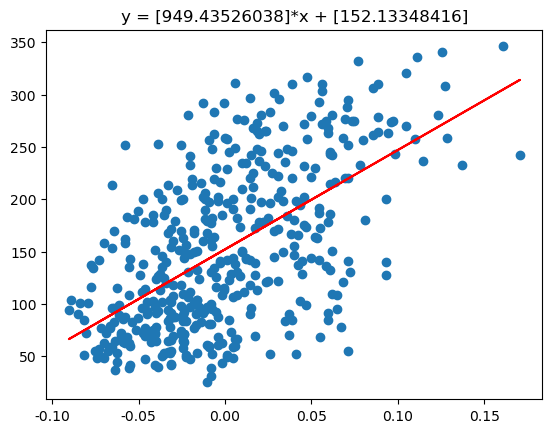

In [47]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X,lr.predict(X),color='red') ## 회귀직선 추가
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

In [ ]:
### 이미지 분류 

In [ ]:
### 시계열 예측 모델링


In [ ]:
# 사이키런의 MinMaxScaler() 함수 활용
# 정의할 결과를 'scaler'로 매핑
from sklearn.preprocessing import StandardScaler
Sclaer = StandardScaler()

X_train = Sclaer.fit_transform(X_train)
X_valid = Sclaer.transform(X_valid)


In [ ]:
target_col = "상품변경여부"
X = change_preset.drop([target_col],axis = 1)
Y = change_preset[target_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, 
                                                    test_size=0.3,  # 7:3
                                                    stratify=Y, # y클래스 비율에 맞게 나누기
                                                    random_state=42)

In [ ]:
# 지정해야할 초기변수들 
WINDOW_SIZE=64 # 64 #1024 # n일간 데이터를 기반으로 내일 데이터 예측 
BATCH_SIZE=4 # 16 # 32
day_offset = 0 # 예측할 미래 날짜 day_offset = 0 이면 하루 뒤

def make_window_size_dataset(data, label, window_size, day_offset=0): # x값 , y값 , 윈도우 사이즈, 예측할 미래 날짜
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size - day_offset):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size + day_offset]))
    return np.array(feature_list), np.array(label_list)

x_WINDOW, y_WINDOW = make_window_size_dataset(X_data, Y_data, WINDOW_SIZE, day_offset)
x_WINDOW.shape,y_WINDOW.shape

In [ ]:
a = math.floor(y_WINDOW.shape[0]*0.2)

y_train_WINDOW = y_WINDOW[:-a]
y_test_WINDOW = y_WINDOW[-a:]

x_train_WINDOW = x_WINDOW[:-a]
x_test_WINDOW = x_WINDOW[-a:]
print(len(y_train_WINDOW),"학습 컬럼")
print(len(y_test_WINDOW),"테스트 컬럼")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, GRU
import keras

from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, LSTM, Dense

from tensorflow.keras.activations import elu,gelu,swish,tanh,softmax
from tensorflow.keras.optimizers import Adam,RMSprop

from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras import layers
import tensorflow as tf
from keras import losses

elu = tf.nn.elu

model = keras.models.Sequential([
    keras.layers.Input(shape=(x_train_WINDOW.shape[1] , x_train_WINDOW.shape[2])),
    keras.layers.LSTM(1024, return_sequences=True, name='LSTM_0'),
    keras.layers.LSTM(512, return_sequences=True, name='LSTM_1'),
    keras.layers.LSTM(256, return_sequences=True, name='LSTM_2'),
    keras.layers.LSTM(128, return_sequences=True, name='LSTM_3'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=elu),
    keras.layers.Dense(1, activation=elu)
#     keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss=Huber(), optimizer=Adam(0.000001), metrics=['mse']) #0.001이 기본 러닝 레이트

In [ ]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
# earlystopping은 (patience 수)n번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model_path = 'C:\\Users\\Happy\\Desktop\논문용\\krwusdtdata'
filename = os.path.join(model_path,'USDT_LSTM_환율예측.h5')

checkpoint = ModelCheckpoint(filename, #filepath
                             monitor='val_loss',#모델 저장시 기준이 되는 값 => val_loss는 loss가 가장 적을 때 저장
                             verbose=1, # 이게 1 이면 저장되었다고 표시됨
                             save_best_only=True, # True의 경우 학습 중 현 시점 가장 좋은 모델로 저장됨
                             save_weights_only=True, # True의 경우 모델 레이어 및 가중치도 저장됨
#                              save_freq = BATCH_SIZE, # 'epoch'을 사용할 경우, 매 에폭마다 모델이 저장됩니다. integer을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장됩니다.
                             mode='auto'# val_acc 인 경우, 정확도이기 때문에 클수록 좋습니다. 따라서 이때는 max를 입력해줘야합니다. 만약 val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋습니다. 따라서 이때는 min을 입력해줘야합니다. auto로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장합니다.
                            )

In [ ]:
history = model.fit(x_train_WINDOW, y_train_WINDOW, 
                                    epochs=1000, 
                                    batch_size=BATCH_SIZE,
#                                     validation_data=(x_validation_WINDOW, y_validation_WINDOW),
                                    validation_data=(x_test_WINDOW, y_test_WINDOW), 
                                    callbacks=[early_stop, checkpoint]) # 여기에 얼리스타핑 ,드롭아웃, L1,L2,엘라 규제 등 추가 가능
# model.load_weights(filename)

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# import os
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0","/gpu:1"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
# # mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
 
# with mirrored_strategy.scope(): # @ whth 문으로 특정 부분에 GPU를 사용하게 함
#     model = keras.models.Sequential([
#         keras.layers.Input(shape=(x_train_WINDOW.shape[1] , x_train_WINDOW.shape[2])),
#         keras.layers.LSTM(1024, return_sequences=True, name='LSTM_0'),
#         keras.layers.Dropout(0.2),
#         keras.layers.LSTM(512, return_sequences=True, name='LSTM_1'),
#         keras.layers.Dropout(0.2),
#         keras.layers.LSTM(256, return_sequences=True, name='LSTM_2'),
#         keras.layers.Dropout(0.2),
#         keras.layers.LSTM(128, return_sequences=True, name='LSTM_3'),
#         keras.layers.Flatten(),
#         keras.layers.Dense(64, activation=elu),
#         keras.layers.Dense(1, activation=elu)
#     #     keras.layers.Dense(1, activation="sigmoid")
#     ])
    
#     # earlystopping은 (patience 수)n번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
#     early_stop = EarlyStopping(monitor='val_loss', patience=100)

#     model_path = path
#     filename = os.path.join(model_path,'USDT_LSTM_환율변동성예측.h5')

#     checkpoint = ModelCheckpoint(filename, #filepath
#                                  monitor='val_loss',#모델 저장시 기준이 되는 값 => val_loss는 loss가 가장 적을 때 저장
#                                  verbose=1, # 이게 1 이면 저장되었다고 표시됨
#                                  save_best_only=True, # True의 경우 학습 중 현 시점 가장 좋은 모델로 저장됨
#                                  save_weights_only=True, # True의 경우 모델 레이어 및 가중치도 저장됨
#     #                              save_freq = BATCH_SIZE, # 'epoch'을 사용할 경우, 매 에폭마다 모델이 저장됩니다. integer을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장됩니다.
#                                  mode='auto'# val_acc 인 경우, 정확도이기 때문에 클수록 좋습니다. 따라서 이때는 max를 입력해줘야합니다. 만약 val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋습니다. 따라서 이때는 min을 입력해줘야합니다. auto로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장합니다.
#                                 )

    
#     # model.compile(loss=Huber(), optimizer=Adam(0.000001), metrics=['mse']) #0.001이 기본 러닝 레이트
#     model.compile(loss=Huber(), optimizer=Adam(0.0000001), metrics=['mse']) #0.001이 기본 러닝 레이트


In [ ]:
history = model.fit(x_train_WINDOW, y_train_WINDOW, 
                                    epochs=1000, 
                                    batch_size=BATCH_SIZE,
#                                     validation_data=(x_validation_WINDOW, y_validation_WINDOW),
                                    validation_data=(x_test_WINDOW, y_test_WINDOW), 
                                    callbacks=[early_stop, checkpoint]) # 여기에 얼리스타핑 ,드롭아웃, L1,L2,엘라 규제 등 추가 가능
# model.load_weights(filename)

In [ ]:
pred = model.predict(x_test_WINDOW) #예측값(실제)
actual = np.asarray(y_test_WINDOW)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

In [ ]:
###
import pandas as pd
import numpy as np

x_tr_len = len(X_train)
X_all = pd.concat([X_train,X_test],axis = 0)


# print(X_all.describe())

# print(X_all["workclass"].value_counts())
# print(X_all["occupation"].value_counts())
# print(X_all["native.country"].value_counts())

#명목형 변수의 경우에 있는 na값들은 의미가 있을 수 있다고 생각하여 False로 na값들을 바꾸어 더미화 전에 새로운 파생변수가 되게 하였다.
X_all.loc[X_all["workclass"].isna() == True,'workclass'] = "False"
X_all.loc[X_all["occupation"].isna() == True,'occupation'] = "False"
X_all.loc[X_all["native.country"].isna() == True,"native.country"] = "False"
X_all = X_all.drop(["id"],axis= 1)
# print(X_all.info())

X_all_1 = pd.get_dummies(X_all)
col = X_all_1.columns

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
Scaler = MinMaxScaler()

X_all_2 = Scaler.fit_transform(X_all_1)
X_all_2 = pd.DataFrame(X_all_2, columns = col)

# X_all_2 = X_all_1 # @ 의사결정 나무일 경우만 (의사결정 나무는 분리하기 때문에 범위가 넓으면 오히려 좋을수도 있다.)

x_train = X_all_2[:x_tr_len]
x_test = X_all_2[x_tr_len:]

LE = LabelEncoder()
y_train["income"] = LE.fit_transform(y_train["income"])

# ## 모델 선정 하기 
a = int(np.floor(x_tr_len/10))
a = x_tr_len - a
x_train_1 = x_train[:a]
x_val_1 = x_train[a:]
# print(x_train_1.index)
# print(x_val_1.index)
y_train_1 = y_train[:a]
y_val_1 = y_train[a:]

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBRFClassifier,XGBClassifier
model = GradientBoostingClassifier()
model.fit(x_train_1,y_train_1["income"])
pred = model.predict(x_val_1)
# prob = model.predict_proba(x_val_1)

from sklearn.metrics import precision_score

print("모델 설명력",model.score(x_train_1,y_train_1["income"]))
print("정밀도",precision_score(y_val_1["income"],pred))

y_test["income"] = LE.transform(y_test["income"])
print("실제 정밀도(알수 x)",precision_score(y_test["income"],model.predict(x_test)))


# ## 제출용 모델 
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBRFClassifier
# model = XGBRFClassifier()
# model.fit(x_train,y_train["income"])
# pred = model.predict(x_test)
# prob = model.predict_proba(x_test)
# pred = LE.inverse_transform(pred) # 라벨인코더 역변환.

# pd.DataFrame({"pred":pred,"prob":prob[:,1],"id":X_test.id}).to_csv("수험번호.csv",index = False)

# y_test["income"] = LE.transform(y_test["income"])# 실제 정밀도 보려고
# print("실제 정밀도(알수 x)",precision_score(y_test["income"],model.predict(x_test)))

### CNN

In [ ]:
import yfinance
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance
import math
import seaborn as sns
# import set_matplotlib_hangul
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

df = yfinance.download('AAPL','2000-1-1','2020-1-1')
# df = df.drop(['Volume'],1).drop(['Adj Close'],1)

In [ ]:
a = math.floor(len(df)*0.1)
b = math.floor(len(df)*0.2)

train_all = df[:-a]
test_all = df[-a:]
validation_all = df[-b:-a]

In [ ]:
def save_png(df,train_test,WINDOW_SIZE):
    
    a2 = int(len(df) - WINDOW_SIZE - 1)
    
    # for i in range(a1):
    #     df1 = df[0 + 30 * i : 30 + 30*i]
    #     fig = plt.figure(figsize=(12, 8))
    #     ax = fig.add_subplot(111)
    #     mpl_finance.candlestick2_ohlc(ax, df1['Open'], df1['High'], df1['Low'], df1['Close'], width=0.5, colorup='r', colordown='b')
    # #     plt.show()
    #     plt.savefig('C:\\Users\\Happy\\Desktop\\help\\cnndata\\cnndata'+str(i)+'.png')
    for i in range(a2):
        df1 = df[0 + i : WINDOW_SIZE + i]
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111)
        mpl_finance.candlestick2_ohlc(ax, df1['Open'], df1['High'], df1['Low'], df1['Close'], width=0.5, colorup='r', colordown='b')
        #plt.show()
        
        df2 = df[(WINDOW_SIZE - 1) + i : (WINDOW_SIZE +1) + i]
        df2.reset_index(drop = True)
        #오르면 O 

        if (df2['Close'][0] < df2['Open'][1]):# 종가가 시가 보다 크면
#         if (df2['Close'][0] < df2['Close'][1]): # 종가가 다음날 종가보다 크면
            plt.savefig('C:\\Users\\Happy\\Desktop\\help\\'+train_test+'\\'+train_test+'O\\cnndata'+str(i)+'.png')
#             plt.savefig('C:\\Users\\Happy\\Desktop\\help\\cnnalldata\\cnndata'+str(i)+'.png')
        else:
            plt.savefig('C:\\Users\\Happy\\Desktop\\help\\'+train_test+'\\'+train_test+'X\\cnndata'+str(i)+'.png')
#             plt.savefig('C:\\Users\\Happy\\Desktop\\help\\cnnalldata\\cnndata'+str(i)+'.png')

In [ ]:
WINDOW_SIZE=30

save_png(train_all,'train',WINDOW_SIZE)
# 아래 두갠 학습 x
save_png(test_all,'test',WINDOW_SIZE)
save_png(validation_all ,'validation',WINDOW_SIZE)

In [ ]:
# 기본 경로
base_dir = 'C:\\Users\\Happy\\Desktop\\help'

validation_dir = os.path.join(base_dir+'\\validation')
train_dir = os.path.join(base_dir+'\\train')
test_dir = os.path.join(base_dir+'\\test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir+ '\\trainO')
train_x_dir = os.path.join(train_dir+ '\\trainX')
print(train_o_dir, train_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir+ '\\testO')
test_x_dir = os.path.join(test_dir+ '\\testX')
print(test_o_dir, test_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir+'\\validationO')
validation_x_dir = os.path.join(validation_dir+'\\validationX')
print(validation_o_dir, validation_x_dir)

In [ ]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary', 
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='grayscale',
                                                              class_mode='binary', 
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.
# 합성곱 신경망 모델 구성하기
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다

In [ ]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint

# earlystopping은 (patience 수)n번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'C:\\Users\\Happy\\Desktop\\help'

filename = os.path.join(model_path,'ox_class_cnn.h5')

checkpoint = ModelCheckpoint(filename, #filepath
                             monitor='val_loss',#모델 저장시 기준이 되는 값 => val_loss는 loss가 가장 적을 때 저장
                             verbose=1, # 이게 1 이면 저장되었다고 표시됨
                             save_best_only=True, # True의 경우 학습 중 현 시점 가장 좋은 모델로 저장됨
                             save_weights_only=True, # True의 경우 모델 레이어 및 가중치도 저장됨
#                              save_freq = BATCH_SIZE, # 'epoch'을 사용할 경우, 매 에폭마다 모델이 저장됩니다. integer을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장됩니다.
                             mode='auto'# val_acc 인 경우, 정확도이기 때문에 클수록 좋습니다. 따라서 이때는 max를 입력해줘야합니다. 만약 val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋습니다. 따라서 이때는 min을 입력해줘야합니다. auto로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장합니다.
                            )
# 모델 훈련
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2,
                              callbacks=[early_stop, checkpoint]
                             )
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

In [ ]:
model.load_weights(filename) #저장된 최적 모델 불러옴 끄면 그냥 최종 모델 사용가능
# 모델 성능 평가
model.evaluate(train_generator)

# 모델 성능 평가
model.evaluate(test_generator)

In [ ]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()